In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches into a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0 # 1/10mm -> inches
inches.shape

(365,)

In [2]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()   # set plot styles

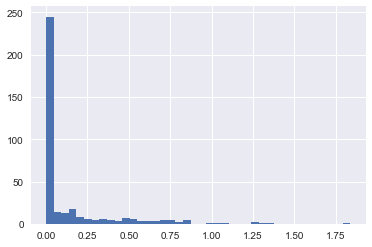

In [3]:
plt.hist(inches, 40);

In [4]:
# similar to ufuncs, we can also do comparisons in a more efficient way than looping

In [5]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3

array([ True,  True, False, False, False])

In [11]:
x > 3

array([False, False, False,  True,  True])

In [7]:
x <= 3

array([ True,  True,  True, False, False])

In [8]:
x >= 3

array([False, False,  True,  True,  True])

In [9]:
x != 3

array([ True,  True, False,  True,  True])

In [10]:
x == 3

array([False, False,  True, False, False])

In [12]:
# can do element comparison of 2 arrays, and include compound expressions

(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [13]:
# similar to ufuncs, the comparisons are actually np.*** methods

np.less(x, 3)

array([ True,  True, False, False, False])

In [14]:
# will work on array of any size and shape

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [15]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [16]:
## Working with Boolean Arrays

In [17]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [18]:
np.count_nonzero(x < 6)

8

In [19]:
np.sum(x < 6)

8

In [26]:
# how many values are less than 6 in each row
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [21]:
np.any(x < 8)

True

In [22]:
np.any(x < 0)

False

In [23]:
np.all(x == 6)

False

In [27]:
# are all values in each row less than 8?

np.all(x < 8, axis=1)

array([ True, False,  True])

In [28]:
## Boolean operators

In [29]:
np.sum((inches > .5) & (inches < 1))

29

In [31]:
# same thing, but why would you do this?
np.sum(~( (inches <= .5) | (inches >= 1)))

29

In [32]:
# similarly to other ufuncs, these are really methods

# & ==> np.bitwise_and

In [35]:
print("Number of days without rain: ", np.sum(inches == 0))
print("Number of days with rain: ", np.sum(inches > 0))
print("Days with more than .5 inches: ", np.sum(inches > .5))
print("Rainy days with < .2 inches: ", np.sum((inches > 0) & (inches < .2)))

Number of days without rain:  215
Number of days with rain:  150
Days with more than .5 inches:  37
Rainy days with < .2 inches:  75


In [36]:
## Boolean arrays as masks

In [37]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [38]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [39]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [41]:
# construct mask of all rainy days

rainy = (inches > 0)

# construct mask of all summer days (June 21st is 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days: ", np.median(inches[rainy]))
print("Median precip on summer days: ", np.median(inches[summer]))
print("Max precip on summer days: ", np.max(inches[summer]))
print("Median precip on non-summer days: ", np.median(inches[rainy & ~summer]))

Median precip on rainy days:  0.19488188976377951
Median precip on summer days:  0.0
Max precip on summer days:  0.8503937007874016
Median precip on non-summer days:  0.20078740157480315


In [45]:
# and/or vs &/|

# and/or is for entire object, &/| is for bits within each object

print(bool(42 and 0))
print(bin(42 | 5))

False
0b101111


In [46]:
# for numpy arrays, bitwise is almost always what you want